In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


We'll continue working with the Pokémon dataset in this workspace.

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task**: Pokémon have a number of different statistics that describe their combat capabilities. Here, create a _histogram_ that depicts the distribution of 'special-defense' values taken. **Hint**: Try playing around with different bin width sizes to see what best depicts the data.

##### barplot equal countplot in seaborn 

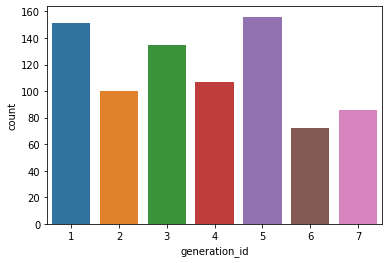

In [4]:
# YOUR CODE HERE
sb.countplot(data=pokemon, x='generation_id')

The above plot has different colors of bar plots but we don't need it, its adding no value since we already know that the bar plots are of different generation (category), therefore we would make the color uniform.

In [5]:
base_color=sb.color_palette()[0]

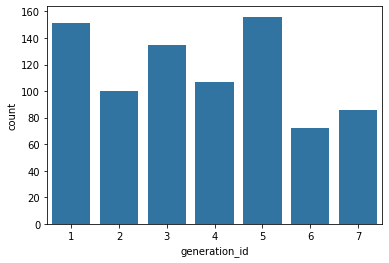

In [6]:
sb.countplot(data=pokemon, x='generation_id', color=base_color)

##### we can order the plot in ascending, descenging or using numbers as well, for adding readability to the graph

here we will sort values using manual sorting, then in the next graph we would sort it using the pandas functions<br>
For nominal-type data, one common operation is to sort the data in terms of frequency. With our data in a pandas DataFrame, we can use various DataFrame methods to compute and extract an ordering, then set that ordering on the "order" parameter:

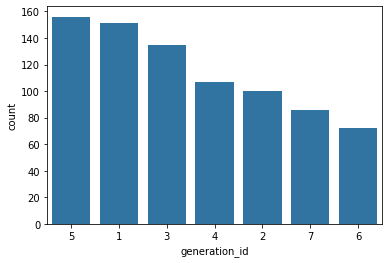

In [16]:
sb.countplot(data=pokemon, x='generation_id', color=base_color,
            order=[5,1,3,4,2,7,6])

In [17]:
generation_counts_sorted = pokemon['generation_id'].value_counts()

In [18]:
generation_counts_sorted

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

To get the index values, we would use .index prop

In [19]:
generation_counts_sorted_index = pokemon['generation_id'].value_counts().index

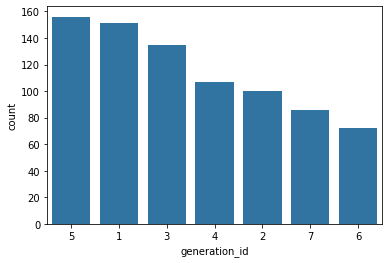

In [20]:
sb.countplot(data=pokemon, x='generation_id', color=base_color,
            order=generation_counts_sorted_index)

#### plot types of pokemon based on weakness  and strengths 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

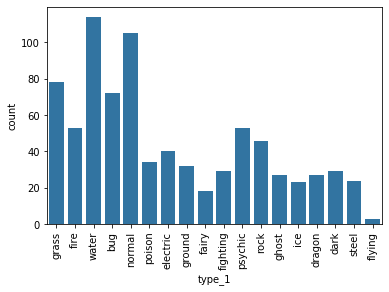

In [23]:
sb.countplot(data=pokemon, x='type_1', color=base_color)
plt.xticks(rotation = 90)

<b>xticks</b> function of matplotlib rotates the label by degrees 

In [24]:
type_1_order_index=pokemon['type_1'].value_counts().index

Above we were plotting on x axis (univariate) according to types (characteristics), we can plot the same things on y axis, just by changing the x to y in countplot

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text xticklabel objects>)

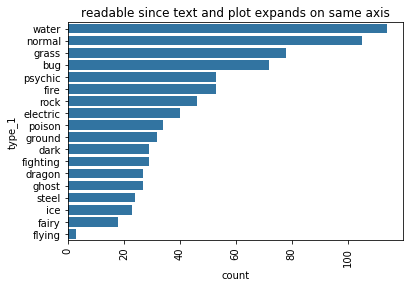

In [27]:
sb.countplot(data=pokemon, y='type_1', color=base_color,
            order=type_1_order_index)
plt.title('readable since text and plot expands on same axis')
plt.xticks(rotation = 90)

ADDITIONAL INFO: If your data is in a pandas Series, 1-d NumPy array, or list, you can also just set it as the first argument to the countplot function, as we do with the Series data_var here:

sb.countplot(data_var)

## RELATIVE FREQUENCY
To find out what portion of data falls under which category

In [37]:
pkmn_types = pokemon.melt(id_vars = ['id', 'species'],
                         value_vars = ['type_1' , 'type_2'],
                         var_name = 'type_level',
                         value_name='type').dropna()
pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


Above we have unpivoted using type_1 and type_2<br>
we are taking id and species as identifiers and unpivoting type_1 and type_2<br>
now both type_1 and type_2 has come onto single column

In [40]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

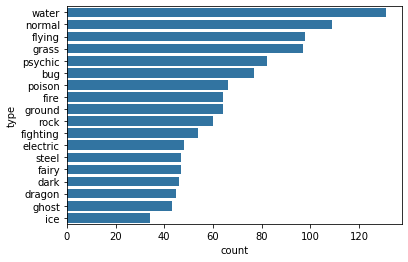

In [41]:
base_color=sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color,
            order=type_order)

we have plotted only absolute value

##### now changing into relative frequency , matplot uses tick to change absolute counts 

now we will try to get the maximin probabilities for our plot

In [42]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1623296158612144


In [46]:
tick_props=np.arange(0,max_prop,0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16])

now we will use tick names to show the value in front of each bar

In [47]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

Now plotting again with tick values and names

Text(0.5, 0, 'proportion')

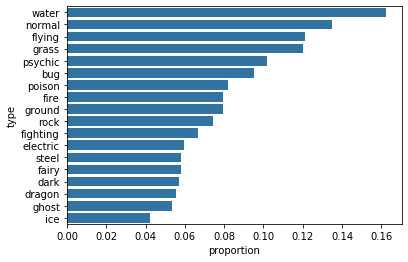

In [48]:
base_color=sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color,
            order=type_order);
plt.xticks(tick_props*n_pokemon, tick_names)
plt.xlabel('proportion')

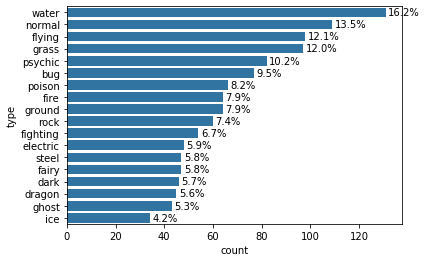

In [49]:
base_color=sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color,
            order=type_order);

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va='center')

## COUNT MISSING DATA 

(14,)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

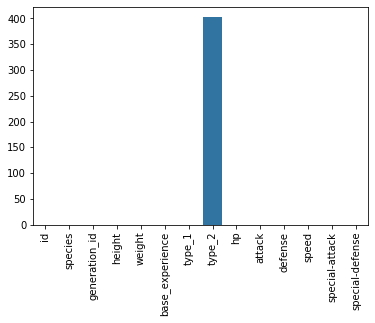

In [57]:
pkmn_na_counts=pokemon.isna().sum()
print(pkmn_na_counts.shape)
base_color = sb.color_palette()[0]
sb.barplot(pkmn_na_counts.index.values, pkmn_na_counts, color=base_color)
plt.xticks(rotation=90)

<b>NOTE:</b> if data is summarized use countplot, if not then use barplot

## HISTOGRAM 